In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
df = pd.read_csv('../data/Week1_challenge_data_source(CSV).csv', na_values=['?', None, 'undefined'])
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
# column names
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [7]:
# number of data points
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 150001 rows and 55 columns


In [8]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(df)

The dataset contains 12.72 % missing values.


In [9]:
# Now which column(s) has missing values
df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [10]:
#remove rows that have nans in the bearer id an msisdn number columns
df = df[~np.isnan(df['Bearer Id'])]
df = df[~np.isnan(df['IMSI'])]
df = df[~np.isnan(df['MSISDN/Number'])]

In [11]:
df.isna().sum()

Bearer Id                                        0
Start                                            0
Start ms                                         0
End                                              0
End ms                                           0
Dur. (ms)                                        0
IMSI                                             0
MSISDN/Number                                    0
IMEI                                             0
Last Location Name                             160
Avg RTT DL (ms)                              27636
Avg RTT UL (ms)                              27616
Avg Bearer TP DL (kbps)                          0
Avg Bearer TP UL (kbps)                          0
TCP DL Retrans. Vol (Bytes)                  87764
TCP UL Retrans. Vol (Bytes)                  96128
DL TP < 50 Kbps (%)                            712
50 Kbps < DL TP < 250 Kbps (%)                 712
250 Kbps < DL TP < 1 Mbps (%)                  712
DL TP > 1 Mbps (%)             

In [12]:
def total_data_per_app(df):
    cols = ['Social Media DL (Bytes)',
     'Social Media UL (Bytes)',
     'Google DL (Bytes)',
     'Google UL (Bytes)',
     'Email DL (Bytes)',
     'Email UL (Bytes)',
     'Youtube DL (Bytes)',
     'Youtube UL (Bytes)',
     'Netflix DL (Bytes)',
     'Netflix UL (Bytes)',
     'Gaming DL (Bytes)',
     'Gaming UL (Bytes)',
     'Other DL (Bytes)',
     'Other UL (Bytes)',
     'Total UL (Bytes)',
     'Total DL (Bytes)'
    ]
    df['Social Media'] = df[cols[0]] + df[cols[1]]
    df['Google'] = df[cols[2]] + df[cols[3]]
    df['Email'] = df[cols[4]] + df[cols[5]]
    df['Youtube'] = df[cols[6]] + df[cols[7]]
    df['Netflix'] = df[cols[8]] + df[cols[9]]
    df['Gaming'] = df[cols[10]] + df[cols[11]]
    df['Other'] = df[cols[12]] + df[cols[13]]
    df['Total Data'] = df[cols[14]] + df[cols[15]]
    return df
df = total_data_per_app(df)

In [13]:

df['Bearer Id'] = df['Bearer Id'].apply(lambda x: '{:.0f}'.format(x))
df['Bearer Id'] = df['Bearer Id'].astype('str')

df['MSISDN/Number'] = df['MSISDN/Number'].apply(lambda x: '{:.0f}'.format(x))
df['MSISDN/Number'] = df['MSISDN/Number'].astype('str')

df['IMSI'] = df['IMSI'].apply(lambda x: '{:.0f}'.format(x))
df['IMSI'] = df['IMSI'].astype('str')

df['IMEI'] = df['IMEI'].apply(lambda x: '{:.0f}'.format(x))
df['IMEI'] = df['IMEI'].astype('str')

df['Handset Manufacturer'] = df['Handset Manufacturer'].astype('str')
df['Last Location Name'] = df['Last Location Name'].astype('str')

df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Social Media,Google,Email,Youtube,Netflix,Gaming,Other,Total Data
0,13114483460844900352,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,208201448079117,33664962239,35521209507511,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,13114483482878900224,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,208201909211140,33681854413,35794009006359,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,13114483484080500736,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,208200314458056,33760627129,35281510359387,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,13114483485442799616,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,208201402342131,33750343200,35356610164913,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0
4,13114483499480700928,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,208201401415120,33699795932,35407009745539,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148506 entries, 0 to 149999
Data columns (total 63 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 148506 non-null  object 
 1   Start                                     148506 non-null  object 
 2   Start ms                                  148506 non-null  float64
 3   End                                       148506 non-null  object 
 4   End ms                                    148506 non-null  float64
 5   Dur. (ms)                                 148506 non-null  float64
 6   IMSI                                      148506 non-null  object 
 7   MSISDN/Number                             148506 non-null  object 
 8   IMEI                                      148506 non-null  object 
 9   Last Location Name                        148506 non-null  object 
 10  Avg RTT DL (ms)     

In [15]:
df = df[['MSISDN/Number', 'Bearer Id', 'Dur. (ms)','Total Data', 'Social Media','Google', 'Email','Youtube','Netflix','Gaming','Other']]
df.head()

,MSISDN/Number,Bearer Id,Dur. (ms),Total Data,Social Media,Google,Email,Youtube,Netflix,Gaming,Other
0,33664962239,13114483460844900352,1823652.0,345629377.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0
1,33681854413,13114483482878900224,1365104.0,707185356.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0
2,33760627129,13114483484080500736,1361762.0,307690973.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0
3,33750343200,13114483485442799616,1321509.0,889352748.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0
4,33699795932,13114483499480700928,1089009.0,607681403.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0


In [16]:
def format_float(value):
    return f'{value:,.2f}'

def convert_bytes_to_megabytes(df, column_list):
    megabyte = 1*10e+5
    for column in column_list:
        df[column] = df[column] / megabyte
    return df

def fix_outlier(df, column_list):
    for column in column_list:
        df = df[df[column] < df[column].quantile(0.97)]
    
    return df

pd.options.display.float_format = format_float

In [17]:
d={
        'Bearer Id': 'count',
        'Dur. (ms)':'sum',
        'Total Data' : 'sum',
        'Social Media' : 'sum',
        'Google' : 'sum',
        'Email' : 'sum', 
        'Youtube' : 'sum',
        'Netflix' : 'sum',
        'Gaming' : 'sum',
        'Other' : 'sum',
}
df = df.groupby('MSISDN/Number').agg(d)
df.head()

,Bearer Id,Dur. (ms),Total Data,Social Media,Google,Email,Youtube,Netflix,Gaming,Other
MSISDN/Number,,,,,,,,,,
3197020876596,1,"877,385.00","232,123,971.00","715,224.00","10,438,660.00","1,520,771.00","11,959,905.00","26,592,300.00","178,048,738.00","470,526,473.00"
33601001722,1,"116,720.00","878,690,574.00","2,232,135.00","4,389,005.00","1,331,362.00","21,624,548.00","27,180,981.00","812,458,661.00","386,570,872.00"
33601001754,1,"181,230.00","156,859,643.00","2,660,565.00","5,334,863.00","3,307,781.00","12,432,223.00","11,221,763.00","119,750,078.00","281,710,071.00"
33601002511,1,"134,969.00","595,966,483.00","3,195,623.00","3,443,126.00","3,205,380.00","21,333,570.00","19,353,900.00","538,827,713.00","501,693,672.00"
33601007832,1,"49,878.00","422,320,698.00","280,294.00","9,678,493.00","2,284,670.00","6,977,321.00","1,942,092.00","391,126,127.00","35,279,702.00"


In [18]:
df.isna().sum()

Bearer Id       0
Dur. (ms)       0
Total Data      0
Social Media    0
Google          0
Email           0
Youtube         0
Netflix         0
Gaming          0
Other           0
dtype: int64

In [19]:
df.describe()

,Bearer Id,Dur. (ms),Total Data,Social Media,Google,Email,Youtube,Netflix,Gaming,Other
count,"106,471.00","106,471.00","106,471.00","106,471.00","106,471.00","106,471.00","106,471.00","106,471.00","106,471.00","106,471.00"
mean,1.39,"146,571.49","691,519,853.42","2,549,791.01","10,890,704.39","3,151,120.96","31,581,722.91","31,563,183.13","600,258,518.58","598,949,256.85"
std,0.81,"186,562.67","491,526,652.87","1,909,684.87","7,552,384.40","2,224,562.52","21,315,507.21","21,309,392.94","449,561,110.91","449,288,975.90"
min,1.00,"7,142.00","33,249,009.00","1,563.00","40,330.00","18,176.00","78,903.00","184,569.00","306,358.00","149,045.00"
25%,1.00,"72,399.50","358,765,225.00","1,211,936.00","5,945,631.50","1,675,398.00","18,636,632.50","18,570,109.00","288,249,263.00","285,874,681.00"
50%,1.00,"103,137.00","618,326,893.00","2,305,229.00","9,592,577.00","2,801,129.00","26,816,330.00","26,731,157.00","542,677,264.00","540,109,665.00"
75%,2.00,"172,799.00","857,873,157.50","3,309,043.00","13,223,179.50","3,848,998.00","37,956,655.00","38,002,332.00","777,704,466.50","775,646,602.50"
max,18.00,"18,553,754.00","8,846,226,494.00","43,374,779.00","152,191,852.00","42,418,782.00","452,958,769.00","399,519,079.00","7,749,432,234.00","8,167,877,776.00"


In [20]:
df = fix_outlier(df, list(df.columns)[1:])

In [21]:
df.describe()

,Bearer Id,Dur. (ms),Total Data,Social Media,Google,Email,Youtube,Netflix,Gaming,Other
count,"80,938.00","80,938.00","80,938.00","80,938.00","80,938.00","80,938.00","80,938.00","80,938.00","80,938.00","80,938.00"
mean,1.05,"104,816.64","511,851,186.67","1,906,754.26","8,136,741.25","2,350,680.76","23,545,838.16","23,461,496.03","443,778,431.04","439,810,938.82"
std,0.21,"67,830.71","252,585,593.18","1,107,320.48","3,843,583.35","1,149,718.26","10,101,182.43","10,032,243.21","249,465,137.05","246,395,862.11"
min,1.00,"7,142.00","33,249,009.00","1,563.00","40,330.00","18,176.00","78,903.00","184,569.00","306,358.00","149,045.00"
25%,1.00,"56,311.00","296,113,996.25","969,093.75","5,078,682.00","1,400,688.75","16,364,804.75","16,305,917.75","229,861,229.50","227,111,677.25"
50%,1.00,"86,405.00","513,491,919.50","1,888,101.50","8,066,335.50","2,342,375.50","23,218,993.00","23,139,037.00","446,272,661.50","441,340,503.00"
75%,1.00,"141,731.75","724,779,287.00","2,813,859.00","10,986,710.25","3,248,973.50","30,285,651.75","30,181,587.25","656,883,359.00","652,893,496.00"
max,3.00,"436,147.00","1,194,732,606.00","5,785,975.00","21,978,765.00","6,160,294.00","57,491,031.00","55,383,996.00","1,048,424,988.00","964,623,478.00"


In [22]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, bins = 50, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


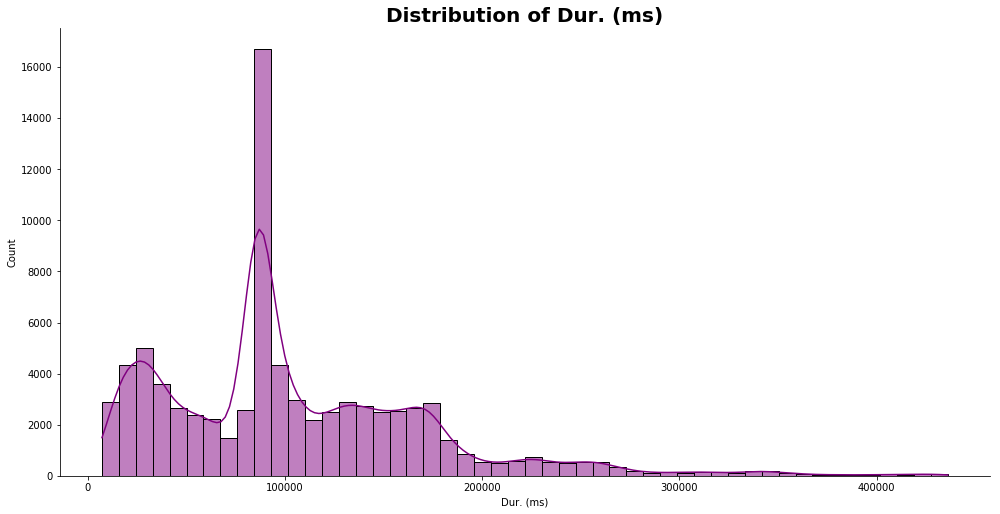

In [23]:
plot_hist(df, "Dur. (ms)", "purple")

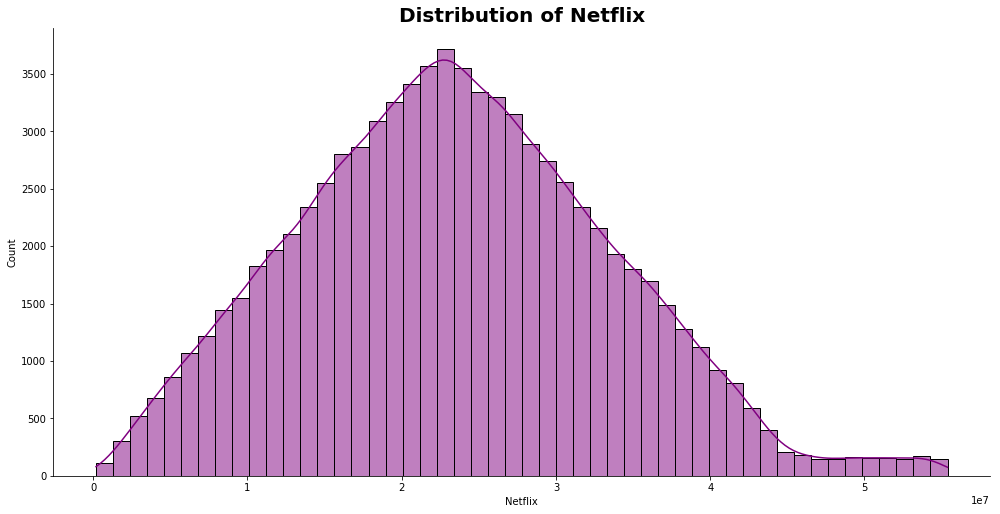

In [24]:
plot_hist(df, "Netflix", "purple")

In [25]:
eng_metr = df[['Bearer Id', 'Dur. (ms)','Total Data']]
eng_metr.head()

,Bearer Id,Dur. (ms),Total Data
MSISDN/Number,,,
33601001722,1,"116,720.00","878,690,574.00"
33601001754,1,"181,230.00","156,859,643.00"
33601002511,1,"134,969.00","595,966,483.00"
33601007832,1,"49,878.00","422,320,698.00"
33601011634,2,"128,360.00","654,723,066.00"


In [26]:
#Top 10 customers by Bearer Id
eng_metr[['Bearer Id']].sort_values(by="Bearer Id", ascending=False).head(10)

,Bearer Id
MSISDN/Number,
33658634289,3
33761127896,3
33634688210,2
33612816288,2
33635448818,2
33695219370,2
33659854958,2
33662760337,2
33658696885,2


In [27]:
#Top 10 customers by Total Duration
eng_metr[['Dur. (ms)']].sort_values(by="Dur. (ms)", ascending=False).head(10)

,Dur. (ms)
MSISDN/Number,
33663830162,"436,147.00"
33625232138,"435,903.00"
33695011259,"435,790.00"
33762226716,"435,626.00"
33621940116,"435,617.00"
33650144039,"435,589.00"
33662140869,"435,329.00"
33610797396,"435,262.00"
33669138880,"435,209.00"


In [28]:
#Top 10 customers by Total Data
eng_metr[['Total Data']].sort_values(by="Total Data", ascending=False).head(10)

,Total Data
MSISDN/Number,
33669453885,"1,194,732,606.00"
33698032445,"1,190,129,040.00"
33640844534,"1,185,998,720.00"
33661345056,"1,184,713,856.00"
33609703829,"1,183,904,431.00"
33667247014,"1,183,291,369.00"
33638589709,"1,182,890,859.00"
33616382341,"1,182,697,776.00"
33699991771,"1,181,820,649.00"


In [29]:
from sklearn.preprocessing import StandardScaler
x = eng_metr.loc[:, :].values
x = StandardScaler().fit_transform(x)
x.shape

(80938, 3)

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(x)
eng_metr['cluster'] = kmeans.labels_


In [31]:
eng_metr.sample(10)

,Bearer Id,Dur. (ms),Total Data,cluster
MSISDN/Number,,,,
33658057641,1,"162,136.00","313,173,082.00",1
33659300097,1,"40,410.00","167,409,915.00",1
33650719861,1,"151,135.00","470,374,390.00",1
33778634531,1,"26,230.00","339,963,902.00",1
33662747424,1,"13,488.00","927,682,453.00",0
33699769561,1,"11,274.00","306,790,002.00",1
33626837050,1,"104,204.00","442,313,570.00",1
33660074813,1,"29,217.00","551,208,458.00",0
33668352481,2,"162,781.00","996,664,300.00",2


In [32]:
eng_metr.reset_index().to_csv('../data/engagement_clusters.csv', index=False)

In [33]:
eng_metr.groupby('cluster').describe()

Bearer Id                                    Dur. (ms)             \
            count mean  std  min  25%  50%  75%  max     count       mean   
cluster                                                                     
0       38,854.00 1.00 0.00 1.00 1.00 1.00 1.00 1.00 38,854.00 101,469.78   
1       38,166.00 1.00 0.00 1.00 1.00 1.00 1.00 1.00 38,166.00 101,355.77   
2        3,918.00 2.00 0.02 2.00 2.00 2.00 2.00 3.00  3,918.00 171,719.85   

                                                                        \
              std       min       25%        50%        75%        max   
cluster                                                                  
0       64,628.16  7,142.00 54,135.50  86,400.00 137,578.75 435,626.00   
1       64,129.43  7,189.00 54,543.50  86,400.00 137,133.75 436,147.00   
2       94,154.01 18,235.00 96,458.00 172,798.00 227,117.50 435,790.00   

        Total Data                                               \
             count           mean            std            min   
cluster                                                           
0        38,854.00 706,454,778.21 122,616,142.35 492,909,052.00   
1        38,166.00 283,932,588.74 122,282,798.82  33,249,009.00   
2         3,918.00 802,206,792.34 239,441,526.13 157,019,990.00   

                                                                         
                   25%            50%              75%              max  
cluster                                                                  
0       600,368,152.50 705,979,622.50   811,732,304.50   950,760,661.00  
1       178,697,856.75 284,970,499.00   389,209,897.00   495,017,202.00  
2       635,058,761.25 833,477,632.00 1,001,857,528.00 1,194,732,606.00

In [34]:
#Top 10 customers by Social Media
df[['Social Media']].sort_values(by="Social Media", ascending=False).head(10)

,Social Media
MSISDN/Number,
33617049602,"5,785,975.00"
33659815702,"5,785,324.00"
33667620518,"5,783,921.00"
33763101279,"5,783,069.00"
33615423883,"5,781,498.00"
33667078568,"5,778,720.00"
33609911082,"5,777,355.00"
33625432266,"5,774,697.00"
33677062130,"5,773,775.00"


In [35]:
#Top 10 customers by Google
df[['Google']].sort_values(by="Google", ascending=False).head(10)

,Google
MSISDN/Number,
33661089105,"21,978,765.00"
33662269924,"21,965,763.00"
33621491722,"21,961,433.00"
33680369980,"21,960,344.00"
33678947413,"21,944,559.00"
33761239984,"21,928,913.00"
33670805120,"21,927,773.00"
33650806112,"21,925,699.00"
33667788444,"21,922,904.00"


In [36]:
#Top 10 customers by Email
df[['Email']].sort_values(by="Email", ascending=False).head(10)

,Email
MSISDN/Number,
33666632323,"6,160,294.00"
33664114877,"6,160,201.00"
33638355933,"6,157,657.00"
33768978337,"6,157,014.00"
33689506992,"6,156,155.00"
33669383961,"6,155,215.00"
33665165793,"6,152,794.00"
33761735365,"6,146,928.00"
33669648576,"6,146,250.00"


In [37]:
#Top 10 customers by Youtube
df[['Youtube']].sort_values(by="Youtube", ascending=False).head(10)

,Youtube
MSISDN/Number,
33660105473,"57,491,031.00"
33623761643,"57,484,821.00"
33665030375,"57,476,995.00"
33658195888,"57,475,399.00"
33615991922,"57,468,235.00"
33610860303,"57,444,366.00"
33620621186,"57,443,514.00"
33658638001,"57,442,231.00"
33664079349,"57,436,999.00"


In [38]:
#Top 10 customers by Netflix
df[['Netflix']].sort_values(by="Netflix", ascending=False).head(10)

,Netflix
MSISDN/Number,
33763573010,"55,383,996.00"
33680369980,"55,375,362.00"
33666261152,"55,369,641.00"
33631965579,"55,367,451.00"
33619857041,"55,357,111.00"
33667018532,"55,340,799.00"
33770724556,"55,339,861.00"
33651872020,"55,336,552.00"
33619019244,"55,335,914.00"


In [39]:
#Top 10 customers by Gaming
df[['Gaming']].sort_values(by="Gaming", ascending=False).head(10)

,Gaming
MSISDN/Number,
33666207950,"1,048,424,988.00"
33646418344,"1,046,254,171.00"
33661345056,"1,046,214,630.00"
33666161335,"1,046,084,634.00"
33627488961,"1,045,965,380.00"
33669453885,"1,045,705,003.00"
33762580185,"1,045,610,470.00"
33695011259,"1,045,587,338.00"
33638589709,"1,045,392,534.00"


In [40]:
#Top 10 customers by Other
df[['Other']].sort_values(by="Other", ascending=False).head(10)

,Other
MSISDN/Number,
33650172636,"964,623,478.00"
33617967887,"964,581,130.00"
33658104958,"964,347,173.00"
33769141670,"964,293,668.00"
33660701239,"964,249,590.00"
33664125469,"964,095,425.00"
33681328893,"964,041,358.00"
33609694467,"963,965,469.00"
33621473400,"963,876,257.00"


In [41]:
apps = df[[ 'Social Media','Google', 'Email','Youtube','Netflix','Gaming','Other']].sum()
apps = apps.to_frame(name = 'Data').reset_index().sort_values(by='Data', ascending=False).head(3)


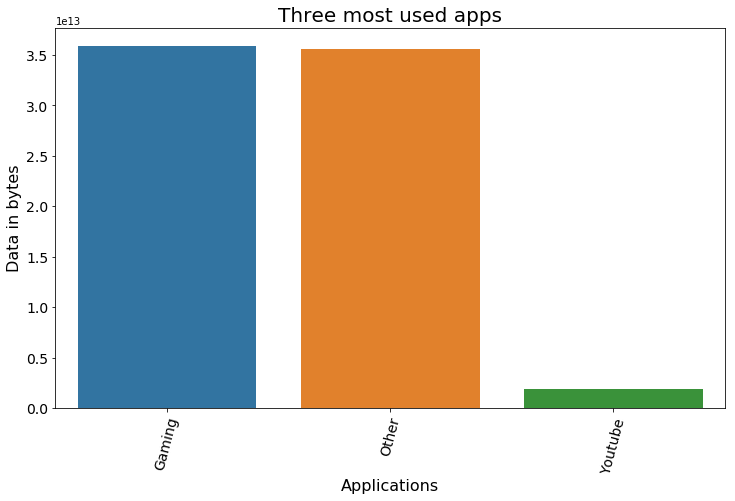

In [42]:
plot_bar(apps, 'index', 'Data', 'Three most used apps', 'Applications', 'Data in bytes')

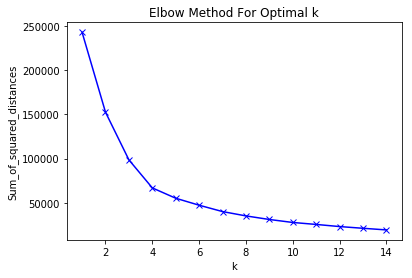

In [43]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### The elbow is at K=3, therefore, 3 is the optimal number of clusters